In [54]:
!pip install seaborn

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv(
    r"C:\Users\USMAN\Pictures\My Files\Business & Data Analyst\Large Projects Data Analysis\Jupyter Files\python_results_globalstore.csv",
    encoding="latin1",
    low_memory=False
)


In [33]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal _Code,City,...,Discount,Profit,Shipping_Cost,Order_Priority,Unnamed: 24,Unnamed: 25,Unnamed: 26,Order_year,Order_month,Promit_Margin
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.0,62.15,40.77,High,1.0,Sum of Sales,Sum of Profit,2014,11,0.279980
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,0.0,Wollongong,...,0.1,-288.77,923.63,Critical,0.0,12642507.25,1467456.67,2014,2,-0.077848
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,0.0,Brisbane,...,0.1,919.97,915.49,Medium,0.0,0,0,2014,10,0.177766
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,0.0,Berlin,...,0.1,-96.54,910.16,Medium,0.0,0,0,2014,1,-0.033376
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,0.0,Dakar,...,0.0,311.52,903.04,Critical,0.0,0,0,2014,11,0.109963


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row_ID          51290 non-null  int64  
 1   Order_ID        51290 non-null  object 
 2   Order_Date      51290 non-null  object 
 3   Ship_Date       51290 non-null  object 
 4   Ship_Mode       51290 non-null  object 
 5   Customer_ID     51290 non-null  object 
 6   Customer_Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal _Code    51290 non-null  float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product_ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub_Category    51290 non-null  object 
 17  Product_Name    51290 non-null 

In [35]:
df.describe()

,Row_ID,Postal _Code,Sales,Quantity,Discount,Profit,Shipping_Cost,Unnamed: 24,Order_year,Order_month,Promit_Margin
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,10753.999844,246.490685,3.476545,0.142908,28.610970,26.478664,0.000019,2013.777208,7.516027,0.047429
std,14806.29199,26042.011167,487.565388,2.278766,0.212280,174.341066,57.251368,0.004416,1.098931,3.300526,0.465672
min,1.00000,0.000000,0.440000,1.000000,0.000000,-6599.980000,1.000000,0.000000,2012.000000,1.000000,-4.733637
25%,12823.25000,0.000000,30.762500,2.000000,0.000000,0.000000,2.610000,0.000000,2013.000000,5.000000,0.000000
50%,25645.50000,0.000000,85.055000,3.000000,0.000000,9.240000,7.790000,0.000000,2014.000000,8.000000,0.169177
75%,38467.75000,0.000000,251.055000,5.000000,0.200000,36.810000,24.450000,0.000000,2015.000000,10.000000,0.333145
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.980000,933.570000,1.000000,2015.000000,12.000000,0.500220


In [36]:
df.fillna(0, inplace=True)

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df['Order_year'] = pd.to_datetime(df['Order_Date']).dt.year
df['Order_month'] = pd.to_datetime(df['Order_Date']).dt.month
df['Promit_Margin'] = df['Profit'] / df['Sales']

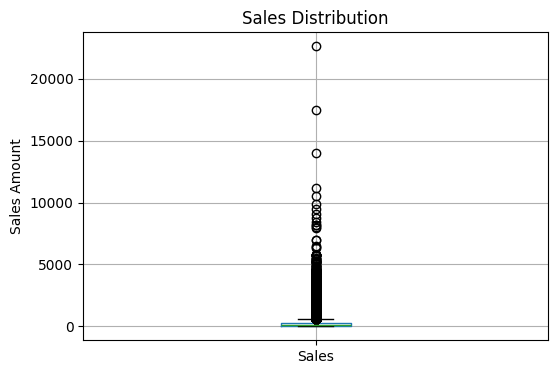

In [39]:
df.boxplot(column='Sales', figsize=(6,4))
plt.title("Sales Distribution")
plt.ylabel("Sales Amount")
plt.show()

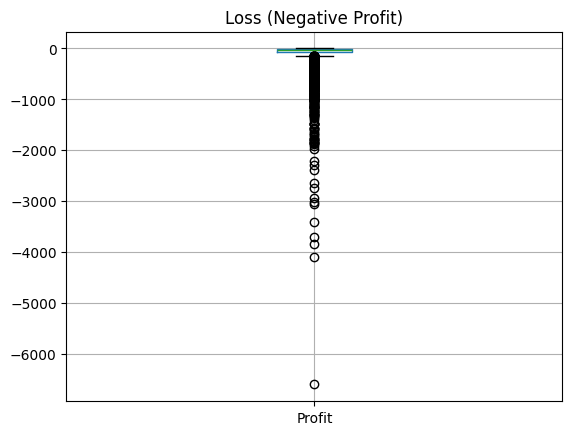

In [40]:
loss_sales = df[df['Profit'] < 0]
loss_sales.boxplot(column = 'Profit')
plt.title("Loss (Negative Profit)")
plt.show()

In [41]:
df.to_csv("python_results_globalstore.csv", index=False)

In [42]:
df.groupby('Product_Name')['Profit'].sum().sort_values()

Product_Name
Cubify CubeX 3D Printer Double Head Print    -8879.97
Lexmark MX611dhe Monochrome Laser Printer    -4589.97
Motorola Smart Phone, Cordless               -4447.04
Cubify CubeX 3D Printer Triple Head Print    -3839.99
Bevis Round Table, Adjustable Height         -3649.90
                                               ...   
Sauder Classic Bookcase, Traditional         10672.06
Hoover Stove, Red                            11807.96
Motorola Smart Phone, Full Size              17027.14
Cisco Smart Phone, Full Size                 17238.52
Canon imageCLASS 2200 Advanced Copier        25199.94
Name: Profit, Length: 3788, dtype: float64

In [43]:
df.groupby('Product_Name')['Profit'].sum().sort_values(ascending=False)

Product_Name
Canon imageCLASS 2200 Advanced Copier        25199.94
Cisco Smart Phone, Full Size                 17238.52
Motorola Smart Phone, Full Size              17027.14
Hoover Stove, Red                            11807.96
Sauder Classic Bookcase, Traditional         10672.06
                                               ...   
Bevis Round Table, Adjustable Height         -3649.90
Cubify CubeX 3D Printer Triple Head Print    -3839.99
Motorola Smart Phone, Cordless               -4447.04
Lexmark MX611dhe Monochrome Laser Printer    -4589.97
Cubify CubeX 3D Printer Double Head Print    -8879.97
Name: Profit, Length: 3788, dtype: float64

In [44]:
df.groupby('Customer_Name')['Order_ID'].count().sort_values(ascending=False)

Customer_Name
Muhammed Yedwab    108
Steven Ward        106
Patrick O'Brill    102
Gary Hwang         102
Bill Eplett        102
                  ... 
David Bremer        34
Darren Budd         31
Nicole Brennan      31
Michael Oakman      29
Kai Rey              7
Name: Order_ID, Length: 796, dtype: int64

In [45]:
df.groupby('Discount')['Profit'].mean().sort_values(ascending=False)

Discount
0.070     140.990133
0.002     125.762820
0.100      63.683658
0.000      61.039522
0.150      50.602736
0.170      38.317184
0.200      23.552765
0.250       4.043636
0.270      -4.317268
0.202     -14.518537
0.450     -41.611468
0.470     -42.982400
0.400     -45.246623
0.300     -57.899765
0.370     -78.461892
0.600     -81.732188
0.320     -88.561481
0.500     -97.141298
0.700    -104.339955
0.402    -109.907981
0.350    -116.144754
0.800    -122.203513
0.602    -213.279130
0.550    -315.068000
0.650    -365.998824
0.570    -526.129167
0.850   -1534.330000
Name: Profit, dtype: float64

In [46]:
df.groupby('Discount')['Profit'].mean().sort_values()

Discount
0.850   -1534.330000
0.570    -526.129167
0.650    -365.998824
0.550    -315.068000
0.602    -213.279130
0.800    -122.203513
0.350    -116.144754
0.402    -109.907981
0.700    -104.339955
0.500     -97.141298
0.320     -88.561481
0.600     -81.732188
0.370     -78.461892
0.300     -57.899765
0.400     -45.246623
0.470     -42.982400
0.450     -41.611468
0.202     -14.518537
0.270      -4.317268
0.250       4.043636
0.200      23.552765
0.170      38.317184
0.150      50.602736
0.000      61.039522
0.100      63.683658
0.002     125.762820
0.070     140.990133
Name: Profit, dtype: float64

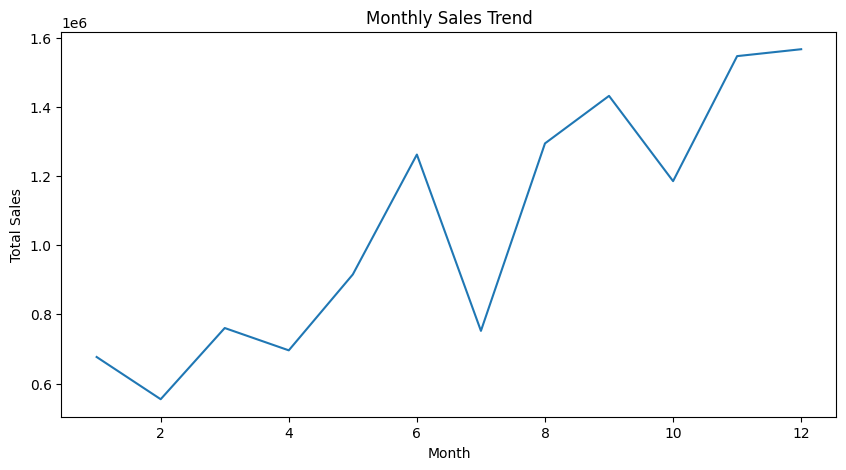

In [52]:
df.groupby('Order_month')['Sales'].sum().plot(
figsize=(10,5),
title='Monthly Sales Trend',
xlabel='Month',
ylabel='Total Sales'
)
plt.show()

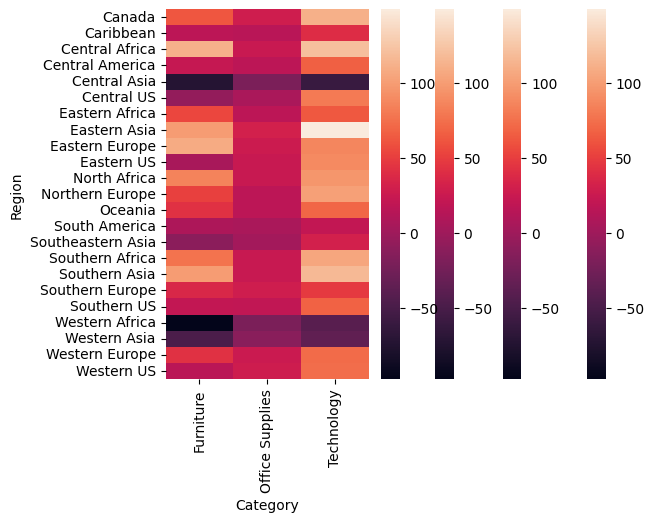

In [59]:
sns.heatmap(df.pivot_table(values='Profit', index='Region', columns='Category'))
plt.show()